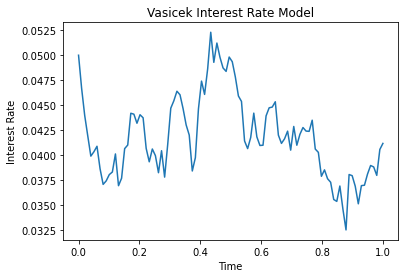

In [13]:
import numpy as np
import matplotlib.pyplot as plt



# Vasicek Model: A mean-reverting model that assumes interest rates follow a normal distribution.
def vasicek(r0, a, b, sigma, T, dt):
    N = int(T / dt)
    rates = np.zeros(N)
    rates[0] = r0

    for t in range(1, N):
        dr = a * (b - rates[t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        rates[t] = rates[t-1] + dr

    return rates

# Parameters
r0 = 0.05
a = 0.1
b = 0.05
sigma = 0.02
T = 1.0
dt = 0.01

# Generate interest rates
rates1 = vasicek(r0, a, b, sigma, T, dt)

# Plot results
plt.plot(np.linspace(0, T, int(T / dt)), rates1)
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Vasicek Interest Rate Model')
plt.show()

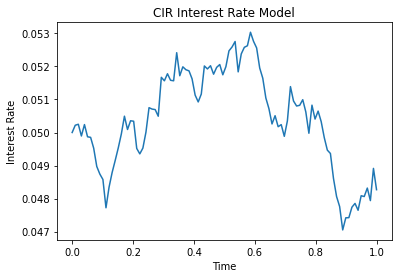

In [14]:
# Cox-Ingersoll-Ross (CIR) Model: Another mean-reverting model, but it ensures non-negative interest rates by assuming a square-root process.
def cir(r0, a, b, sigma, T, dt):
    N = int(T/dt)
    rates = np.zeros(N)
    rates[0] = r0

    for t in range(1, N):
        dr = a * (b - rates[t-1]) * dt + sigma * np.sqrt(rates[t-1] * dt) * np.random.normal()
        rates[t] = rates[t-1] + dr

    return rates

# Parameters

r0 = 0.05
a = 0.1
b = 0.05
sigma = 0.02
T = 1.0
dt = 0.01

# Generate interest rates

rates2 = cir(r0, a, b, sigma, T, dt)

# Plot results

plt.plot(np.linspace(0, T, int(T / dt)), rates2)
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('CIR Interest Rate Model')
plt.show()

In [9]:
def calculate_var(rates, confidence_level=0.95):
    sorted_rates = np.sort(rates)
    index = int((1 - confidence_level)* len(sorted_rates))
    var = sorted_rates[index]
    return var

# Calculate VaR for the Vasicek model

vasicek_var = calculate_var(rates1)
print(f"Value at Risk (VaR) for the Vasicek model: {vasicek_var:.2%}")

# Calculate VaR for the CIR model

cir_var = calculate_var(rates2)
print(f"Value at Risk (VaR) for the CIR model: {cir_var:.2%}")

Value at Risk (VaR) for the Vasicek model: 3.28%
Value at Risk (VaR) for the CIR model: 4.68%
